In [2]:
import generate_fibers as gf
import perform_ASTRA as tomo
import numpy as np
import h5py
import json
import time 

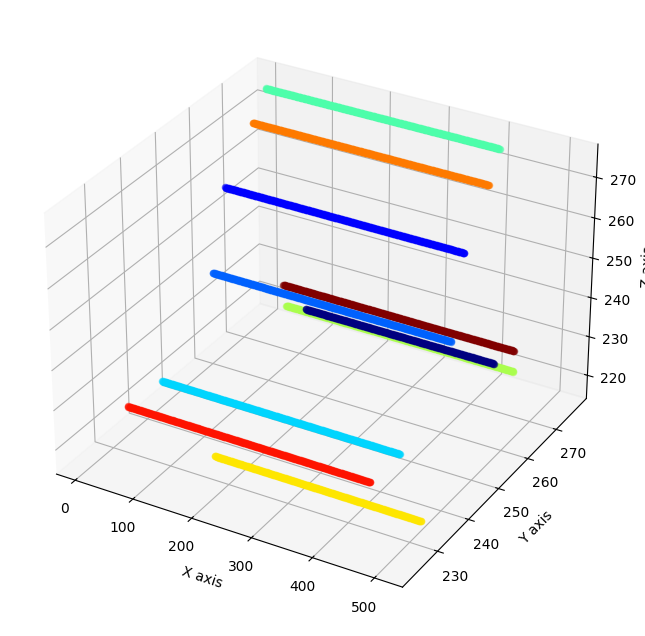

Total processing time: 13.718347549438477 seconds


In [3]:
def main():

    start_time = time.time()
    with open("parameters.json", "r") as file:
        params = json.load(file)
    
    for i in range(50, 50 + params["num_volumes"]):
        volume = np.zeros(params["volume_dimensions"])
        random_seed = params["random_seed"] + i  # diff seed for each volume

        gf.generate_and_count_fibers(volume, params["num_fibers"], params["mode"], params["pipe_radius"])

        volume_filename = f"fiber_volume_{i}.nii"
        gf.save_as_nifti(volume, volume_filename)

        # original_recon, noisy_recon = tomo.perform_tomography(
        #     volume, params["volume_dimensions"], params["num_angles"], params["geometry_type"],
        #     params["det_width_u"], params["det_width_v"], params["det_count_x"],
        #     params["det_count_y"], params["i0"], params["gamma"], params["algorithm"], params["show_plots"]
        # )

        # gf.save_as_nifti(original_recon, f"original_reconstruction_{i}.nii")
        # gf.save_as_nifti(noisy_recon, f"noisy_reconstruction_{i}.nii")

        with h5py.File(f"volume_and_reconstruction_{i}.hdf5", "w") as h5f:
            for key, value in params.items():
                h5f.attrs[key] = str(value)
            h5f.attrs["random_seed"] = str(random_seed)

        end_time = time.time() 
        elapsed_time = end_time - start_time

        print(f"Total processing time: {elapsed_time} seconds")

if __name__ == "__main__":
    main()

In [2]:
# for checking 

file_path = 'volume_and_reconstruction_0.hdf5'

def read_hdf5(file_path):
    with h5py.File(file_path, "r") as file:
        print("Metadata:")
        for attr_name, attr_value in file.attrs.items():
            print(f"{attr_name}: {attr_value}")

read_hdf5(file_path)


Metadata:
algorithm: SIRT3D_CUDA
det_count_x: 512
det_count_y: 768
det_width_u: 1.0
det_width_v: 1.0
gamma: 0.005
geometry_type: parallel3d
i0: 200
mode: straight
num_angles: 180
num_fibers: 200
num_volumes: 50
pipe_radius: 250
random_seed: 42
show_plots: True
volume_dimensions: [512, 512, 512]
